In [29]:
import tobac
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = tobac.testing.make_sample_data_2D_3blobs_inv()

In [31]:
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, threshold=1)

     frame  idx     hdim_1      hdim_2   num  threshold_value  feature  \
0        0    1  14.272026   14.272026   908                1        1   
1        1    1  15.228659   14.670732   984                1        2   
2        2    1  16.162111   15.055608  1061                1        3   
3        3    1  17.130396   15.406167  1135                1        4   
4        4    1  18.143802   15.751240  1210                1        5   
..     ...  ...        ...         ...   ...              ...      ...   
105     67    2  85.393745  130.422614  1247                1      106   
106     68    1  83.326203   30.149733  1496                1      107   
107     68    2  86.731211  131.549072  1131                1      108   
108     69    1  85.863315   30.864101  1273                1      109   
109     69    2  87.981336  132.798625  1018                1      110   

                    time              timestr  projection_x_coordinate  \
0    2000-01-01 12:00:00  2000-01-01 

In [36]:
mask, features = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=1)

<xarray.DataArray 'w' (time: 100, x: 100, y: 200)>
[2000000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-01-01T13:39:00
  * x          (x) float64 0.0 1e+03 2e+03 3e+03 ... 9.7e+04 9.8e+04 9.9e+04
  * y          (y) float64 0.0 1e+03 2e+03 3e+03 ... 1.97e+05 1.98e+05 1.99e+05
    latitude   (x, y) float64 ...
    longitude  (x, y) float64 ...
Attributes:
    units:    m s-1


In [81]:
track = tobac.themes.tobac_v1.linking_trackpy(features, data, dt=dt, dxy=dxy, v_max = 100)

Frame 69: 2 trajectories present.


In [82]:
track.where(track['cell'] == 1)

<xarray.Dataset>
Dimensions:                  (index: 110)
Coordinates:
  * index                    (index) int64 0 1 2 3 4 5 ... 105 106 107 108 109
Data variables: (12/16)
    frame                    (index) float64 0.0 1.0 2.0 3.0 ... nan nan nan nan
    idx                      (index) float64 1.0 1.0 1.0 1.0 ... nan nan nan nan
    hdim_1                   (index) float64 14.27 15.23 16.16 ... nan nan nan
    hdim_2                   (index) float64 14.27 14.67 15.06 ... nan nan nan
    num                      (index) float64 908.0 984.0 1.061e+03 ... nan nan
    threshold_value          (index) float64 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                       ...
    projection_y_coordinate  (index) float64 1.427e+04 1.467e+04 ... nan nan
    latitude                 (index) object 24.14 24.15 24.16 ... nan nan nan
    longitude                (index) object 150.1 150.1 150.2 ... nan nan nan
    ncells                   (index) float64 904.0 983.0 1.059e+03 ... nan nan
    cell                     (index) float64 1.0 1.0 1.0 1.0 ... nan nan nan nan
    time_cell                (index) timedelta64[ns] 00:00:00 00:01:00 ... NaT

<IPython.core.display.Javascript object>


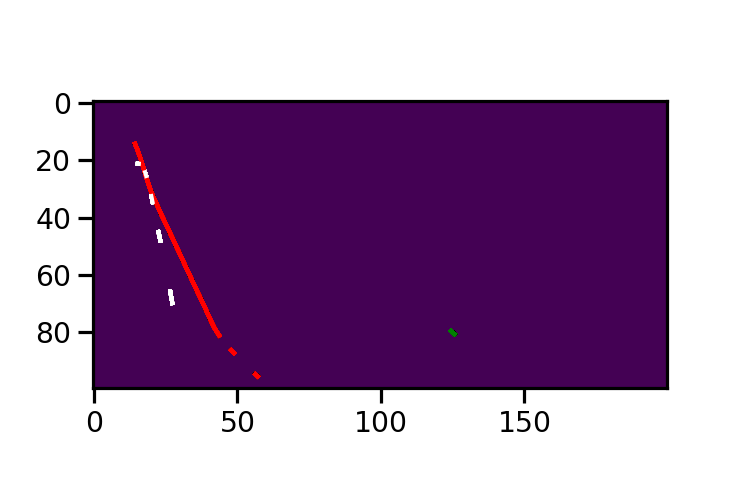

In [124]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook
mask_1 = track['cell'] == 1
mask_2 = track['cell'] == 2
mask_3 = track['cell'] == 3

fig, ax = plt.subplots(ncols = 1, nrows = 1)

def animate(i):

    ax.imshow(data[i])
    ax.plot(track.where(mask_1)['hdim_2'], track.where(mask_1)['hdim_1'], 'r-')
    ax.plot(track.where(mask_2)['hdim_2'], track.where(mask_2)['hdim_1'], 'w-')
    ax.plot(track.where(mask_3)['hdim_2'], track.where(mask_3)['hdim_1'], 'g-')
            
FuncAnimation(fig, animate, interval=100)

In [127]:
help(tobac.plot.plot_mask_cell_track_follow())

TypeError: plot_mask_cell_track_follow() missing 7 required positional arguments: 'cell', 'track', 'cog', 'features', 'mask_total', 'field_contour', and 'field_filled'